In [88]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from collections import defaultdict
from IPython.display import clear_output
import time

In [4]:
def read_json(json_filename):
    with open(json_filename, 'r') as f:
        return json.loads(f.read())

In [7]:
path_to_request = '../test_data/inputs/simple_test_1/request.json'

path_to_result_directory = '../test_data/results/annealing/simple_test_1'
path_to_checkpoints = os.path.join(path_to_result_directory, 'checkpoints_1.json')
path_to_penalty_history = os.path.join(path_to_result_directory, 'penalty_history_1.json')

In [8]:
request = read_json(path_to_request)

checkpoints = read_json(path_to_checkpoints)
penalty_history = read_json(path_to_penalty_history)

In [10]:
checkpoints[0]

{'iteration_number': 0,
 'penalty_values': {'distance-penalty': 832220.125},
 'routes': [{'location_ids': ['location 9',
    'location 6',
    'location 5',
    'location 8',
    'location 7',
    'location 4',
    'location 2',
    'location 3',
    'location 1'],
   'vehicle_id': 'courier 2'},
  {'location_ids': [], 'vehicle_id': 'courier 1'}],
 'total_penalty': 832220.125}

In [63]:
def get_location_id_to_location(request):
    return {location['id']: location for location in request['locations']}


def plot_route(request, route, ax=None):    
    if ax is None:
        ax = plt.gca()
        
    if len(route['location_ids']) == 0:
        ax.plot([], [], label=route['vehicle_id'])
        return
        
    location_id_to_location = get_location_id_to_location(request)
    lons = [location_id_to_location[location_id]['point']['lon'] for location_id in route['location_ids']]
    lats = [location_id_to_location[location_id]['point']['lat'] for location_id in route['location_ids']]
    
    wrapped_depot = [depot for depot in request['depots'] if depot['id'] == location_id_to_location[route['location_ids'][0]]['depot_id']]
    assert len(wrapped_depot) == 1
    depot = wrapped_depot[0]
    depot_lon = depot['point']['lon']
    depot_lat = depot['point']['lat']
    
    ax.plot([depot_lon] + lons, [depot_lat] + lats, label=route['vehicle_id'])
    ax.legend()


def plot_map(request, ax=None):
    need_to_show = (ax is None)
    if ax is None:
        plt.figure(figsize=(12, 8))
        ax = plt.gca()
        
    ax.set_xlabel('longitude', fontsize=14)
    ax.set_ylabel('latitude', fontsize=14)
    
    locations_lons = [location['point']['lon'] for location in request['locations']]
    locations_lats = [location['point']['lat'] for location in request['locations']]
    ax.scatter(locations_lons, locations_lats, c='r', s=10)
    
    depots_lons = [depot['point']['lon'] for depot in request['depots']]
    depots_lats = [depot['point']['lat'] for depot in request['depots']]
    ax.scatter(depots_lons, depots_lats, c='b', s=20, marker='*')
    
    ax.grid(visible=True)
    
    if need_to_show:
        plt.show()
    
    
def plot_routes(request, routes, title='', ax=None):
    need_to_show = (ax is None)
    if ax is None:
        plt.figure(figsize=(12, 8))
        ax = plt.gca()
        
    plot_map(request, ax)
    
    ax.set_title(title, fontsize=16)
              
    for route in routes:
        plot_route(request, route, ax)
              
    ax.legend()
    if need_to_show:
        plt.show()

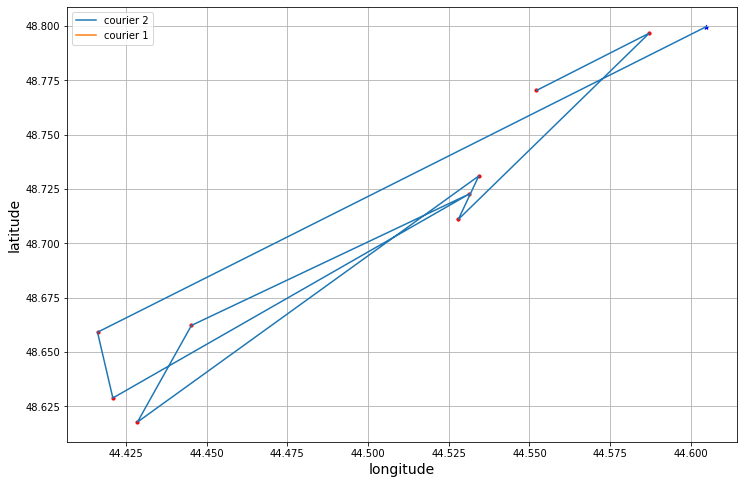

In [64]:
plot_routes(request, checkpoints[0]['routes'])

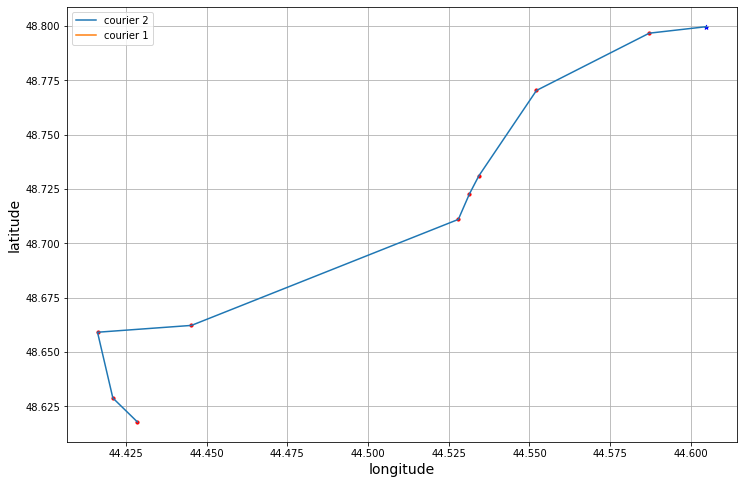

In [66]:
plot_routes(request, checkpoints[-1]['routes'])

In [67]:
def plot_penalty_history(penalty_history, skip_first_n=0, title='', ax=None):
    need_to_show = (ax is None)
    if ax is None:
        plt.figure(figsize=(12, 8))
        ax = plt.gca()
    
    n_iterations = len(penalty_history[list(penalty_history.keys())[0]])
    
    total_penalty = np.zeros(n_iterations)
    
    for penalty_type in penalty_history:
        ax.plot(range(skip_first_n, n_iterations), penalty_history[penalty_type][skip_first_n:], label=penalty_type)
        total_penalty += np.array(penalty_history[penalty_type])
        
    ax.plot(range(skip_first_n, n_iterations), total_penalty[skip_first_n:], label='total-penalty')
    
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Iteration number', fontsize=14)
    ax.set_ylabel('Penalty value', fontsize=14)
        
    ax.grid(visible=True)
    ax.legend(fontsize='x-large')
    
    if need_to_show:
        plt.show()

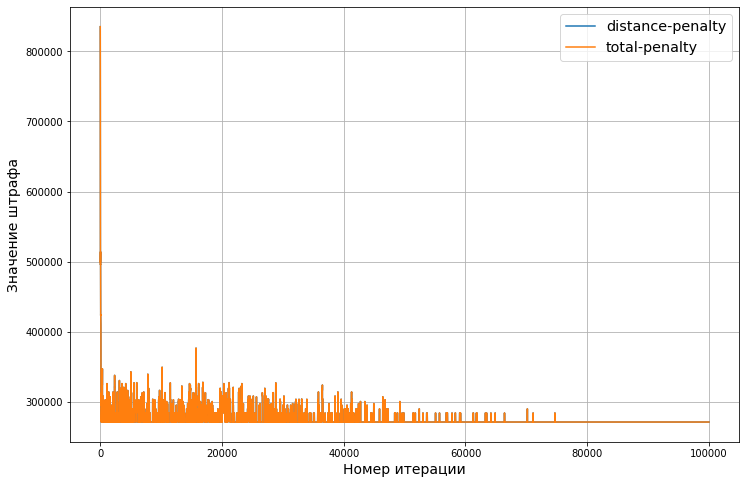

In [54]:
plot_penalty_history(penalty_history, skip_first_n=0)

In [113]:
def plot_checkpoints(checkpoints):
    penalty_history_part = defaultdict(list)
        
    for i, checkpoint in enumerate(checkpoints):
        fig, axes = plt.subplots(1, 2, figsize=(20, 8))
        clear_output(wait=True)
        
        fig.suptitle(f'Iteration #{checkpoint["iteration_number"]}', fontsize=20)
        
        for penalty_type in checkpoint['penalty_values']:
            penalty_history_part[penalty_type].append(checkpoint['penalty_values'][penalty_type])
                     
        plot_routes(request, checkpoint['routes'], ax=axes[0])
        plot_penalty_history(penalty_history_part, ax=axes[1])
        
        plt.show()


In [114]:
plot_checkpoints(checkpoints)

KeyboardInterrupt: 